# Clustering-Hierarchical (Airlines)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 

In [2]:
data = pd.read_excel(r"C:\Users\Admin\Desktop\data science csv files\EastWestAirlines.xlsx",sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.drop(['ID#'],axis=1,inplace=True)

In [6]:
data.rename(columns = {'Award?':'Award'}, inplace = True)

In [7]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
data.iloc[:,0:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()
new_df=normalize.fit_transform(data.iloc[:,0:].to_numpy())
df_norm=pd.DataFrame(new_df,columns=data.columns[0:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


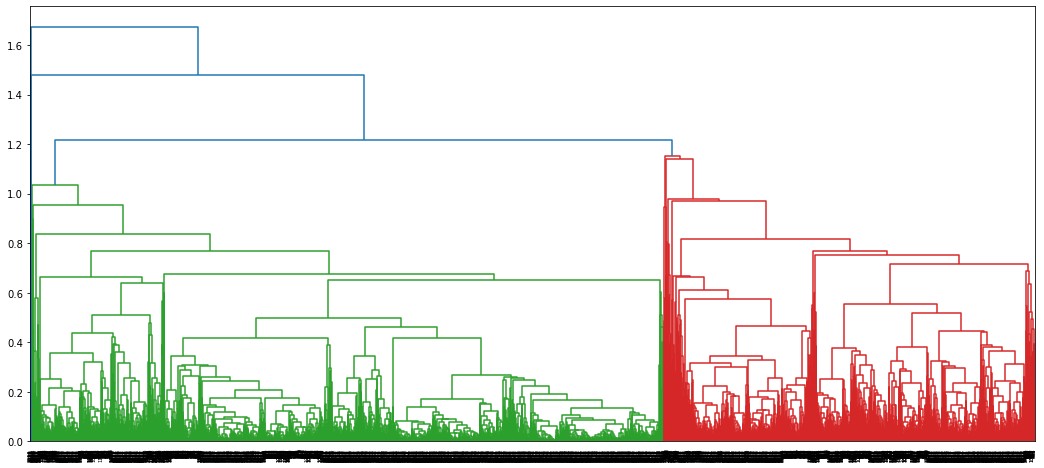

In [10]:
# Create Dendrograms
plt.figure(figsize=(18,8))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [12]:
hc=AgglomerativeClustering(n_clusters=4,
                        affinity='euclidean',
                          linkage='average')

In [13]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [14]:
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [15]:
df_norm['h_clusterid']=clusters
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [16]:
df_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.0,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1513,0.073189,0.152853,0.00,0.0,0.0,0.043855,0.093023,0.022715,0.037736,0.584157,1.0,0
1512,0.002803,0.000000,0.00,0.0,0.0,0.002275,0.023256,0.000000,0.000000,0.593682,1.0,0
3162,0.060535,0.000000,0.00,0.0,0.0,0.012136,0.046512,0.006490,0.037736,0.187364,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.0,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
275,1.000000,0.000000,0.00,0.0,0.0,0.064880,0.372093,0.156505,0.433962,0.877864,1.0,2
3594,0.016200,0.000000,0.75,0.0,0.0,0.317523,0.790698,0.455917,0.867925,0.159513,1.0,3
3235,0.168364,0.000000,0.00,0.0,0.0,0.099213,0.674419,0.417724,1.000000,0.273692,1.0,3
2015,0.031224,0.079656,0.75,0.0,0.0,0.306032,0.755814,0.717137,0.849057,0.461659,1.0,3


In [17]:
data['h_clusterid']=clusters
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [18]:
data.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1513,124775,1704,1,1,1,11564,8,700,2,4847,1,0
1512,4779,0,1,1,1,600,2,0,0,4926,1,0
3162,103203,0,1,1,1,3200,4,200,2,1556,1,0
3165,194816,0,1,1,1,20822,25,6647,12,2424,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,2
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3


# K MEANS CLUSTERING

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
data = pd.read_excel(r"C:\Users\Admin\Desktop\data science csv files\EastWestAirlines.xlsx",sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [21]:
data.drop(['ID#'],axis=1,inplace=True)

In [22]:
data.rename(columns = {'Award?':'Award'}, inplace = True)

In [23]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [24]:
data.iloc[:,0:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data_df=scaler.fit_transform(data.iloc[:,0:])
scaled_data_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [26]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(scaled_data_df)

KMeans(n_clusters=3, random_state=0)

In [27]:
kmeans.inertia_

30899.246824652135

In [28]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score

wcss=[]
sil_score=[]
cal_haz_score=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue
    sil_score.append(silhouette_score(scaled_data_df,kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(scaled_data_df,kmeans.labels_))

In [29]:
wcss

[43989.00000000009,
 35409.511452424435,
 30899.24682465214,
 27446.37245668133,
 24541.329582045764,
 21089.97362892965,
 19165.86145865559,
 17316.86644612829,
 16043.406242309538,
 14726.983322766806]

In [30]:
sil_score

[0.3256981835090824,
 0.3121716765282414,
 0.32563311512799126,
 0.31819537664378844,
 0.3338735662323181,
 0.22085896619040385,
 0.23657639934232003,
 0.2984364654012059,
 0.2617650187720957]

In [31]:
cal_haz_score

[968.4464517601235,
 846.4066128459535,
 802.6294080679738,
 791.2595637632751,
 867.1073529718658,
 861.7228891659855,
 878.1595440795196,
 868.7617322895064,
 880.6675321168498]

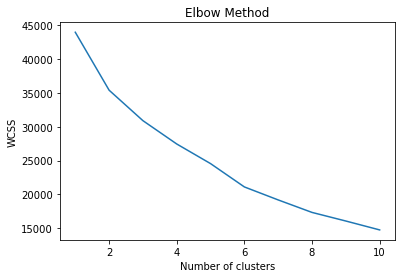

In [32]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [33]:
clusters_new=KMeans(7,random_state=42)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=7, random_state=42)

In [34]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 6, 6])

In [35]:
data["clusterid_new"]=clusters_new.labels_
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,6
3995,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,6


In [36]:
clusters_new.cluster_centers_

array([[-1.40471488e-01, -1.05911463e-01, -5.02166046e-01,
        -9.82418871e-02, -5.85190496e-02, -4.58732485e-01,
        -3.58603116e-01, -1.47866721e-01, -1.53378787e-01,
         7.86202019e-01, -1.55627313e-01],
       [ 4.67870883e-01, -1.12539000e-01,  1.32311231e+00,
        -9.82418871e-02, -5.33241439e-02,  1.06139424e+00,
         7.94133023e-01, -7.25746014e-02, -8.22217421e-02,
         3.22300047e-01,  6.64535165e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.24639805e-02,  5.17838824e-02],
       [ 1.14246078e+00,  4.18490595e-01,  1.40916397e-01,
        -9.82418871e-02, -6.27665798e-02,  6.64166263e-01,
  

In [37]:
data.groupby("clusterid_new").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusterid_new,,,,,,,,,,,
0,59320.541011,62.133389,1.366197,1.000000,1.000829,6050.733223,8.142502,252.827672,0.791218,5741.470588,0.294946
1,120856.216790,57.110701,3.881919,1.000000,1.001845,42800.992620,19.236162,358.779520,1.062731,4785.694649,0.690959
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,188719.176056,467.845070,2.253521,1.000000,1.000000,33183.098592,28.140845,5735.267606,16.633803,4664.007042,0.802817
5,118527.293103,5486.241379,2.051724,1.000000,1.000000,19386.500000,12.500000,980.724138,2.913793,3928.534483,0.551724
6,36564.384138,36.271034,1.268276,1.000000,1.000000,4817.745517,6.772414,166.717241,0.507586,2222.382759,0.141379


In [38]:
data[data["clusterid_new"]==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,1,1,1,5491,18,2116,5,3204,1,0
3754,221543,0,1,1,1,10300,5,200,3,3554,1,0
3755,77978,0,1,1,1,1373,10,650,6,3753,1,0
3760,19483,0,1,1,1,4263,18,0,0,3589,1,0


In [39]:
data[data["clusterid_new"]==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
6,84914,0,3,1,1,27482,25,0,0,6994,0,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3973,72297,0,3,1,1,16241,16,0,0,1587,1,1
3974,58387,0,3,1,1,14581,39,0,0,1435,0,1
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,1
3985,59017,0,4,1,1,34746,25,0,0,1418,0,1


In [40]:
data[data["clusterid_new"]==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,2
384,28193,0,5,1,4,103456,32,0,0,6980,1,2
850,25629,0,4,1,5,107308,36,600,2,5966,1,2
904,15835,0,2,1,5,112171,16,0,0,5825,1,2
1036,154664,0,4,1,3,73881,33,0,0,5769,0,2
1244,166465,0,4,1,4,98717,30,0,0,5531,0,2
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,2
1878,128302,0,5,1,4,132263,32,400,2,4103,1,2
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,2
1946,126873,0,4,1,5,95598,32,500,1,3880,1,2


In [41]:
data[data["clusterid_new"]==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
8,443003,0,3,2,1,1753,43,3850,12,6948,1,3
198,8669,0,1,3,1,11397,16,0,0,7486,1,3
226,117329,0,1,2,1,6448,11,0,0,7416,1,3
381,167670,0,1,3,1,15907,13,0,0,6994,0,3
392,11189,0,1,2,1,9044,20,0,0,8296,1,3
561,380930,0,2,2,1,22485,25,213,1,6539,1,3
794,55610,0,1,2,1,5095,13,0,0,6151,0,3
940,44824,0,1,3,1,21107,19,2000,4,5916,1,3
1149,84856,0,1,2,1,6894,13,0,0,5547,0,3
1270,16103,0,1,3,1,10819,13,0,0,5427,0,3


In [42]:
data[data["clusterid_new"]==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
42,60313,0,1,1,1,10000,26,3250,9,7829,1,4
65,53914,0,3,1,1,33767,45,5550,29,6826,1,4
94,185549,0,5,1,1,110859,39,2950,16,6778,1,4
112,124198,0,5,1,1,66330,23,4833,10,7710,0,4
127,213150,0,4,1,1,56308,41,5200,14,7645,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,4
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,4
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,4
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,4


In [43]:
data[data["clusterid_new"]==5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
70,84409,5031,2,1,1,15436,16,1150,4,7766,0,5
335,278457,6727,4,1,1,57313,27,1000,2,7101,1,5
420,529886,7210,1,1,1,23866,26,7741,15,8296,1,5
532,86520,3445,5,1,1,64450,20,1000,2,6592,1,5
589,133445,8264,1,1,1,3375,13,0,0,6492,1,5
676,26556,3490,1,1,1,2845,14,720,4,6339,1,5
681,119082,5051,1,1,1,4230,17,3600,14,6340,1,5
743,440265,4081,1,1,1,22750,15,1250,10,6234,1,5
800,74924,6286,4,1,1,59650,13,0,0,6141,0,5
820,363165,2565,1,1,1,5950,11,1850,8,6116,1,5


In [44]:
data[data["clusterid_new"]==6]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
1129,1625,0,1,1,1,1375,4,0,0,1547,0,6
1272,24698,0,1,1,1,1329,5,500,1,4267,0,6
1311,31484,0,1,1,1,3125,11,0,0,4117,0,6
1424,22093,0,3,1,1,14857,11,200,1,2587,0,6
1431,44665,0,1,1,1,333,2,333,2,3601,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,6
3994,18476,0,1,1,1,8525,4,200,1,1403,1,6
3995,64385,0,1,1,1,981,5,0,0,1395,1,6
3997,54899,0,1,1,1,500,1,500,1,1401,0,6


In [45]:
data.sort_values("clusterid_new")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1088,82120,0,1,1,1,8000,3,0,0,5619,0,0
1086,75428,0,2,1,1,7539,14,0,0,5609,0,0
2048,63820,0,3,1,1,13981,15,0,0,4608,0,0
2050,76659,0,1,1,1,0,0,0,0,4608,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2245,11136,0,1,1,1,100,1,0,0,3571,1,6
3013,14710,0,1,1,1,3500,2,0,0,3149,1,6
3012,23179,0,1,1,1,0,0,0,0,2794,0,6
3010,24406,0,1,1,1,5005,14,0,0,3127,0,6


In [46]:
data["clusterid_new"].value_counts()

6    1450
0    1207
1    1084
4     142
5      58
3      43
2      15
Name: clusterid_new, dtype: int64

# DBSCAN

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [48]:
data = pd.read_excel(r"C:\Users\Admin\Desktop\data science csv files\EastWestAirlines.xlsx",sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [49]:
data.drop(['ID#'],axis=1,inplace=True)

In [50]:
data.rename(columns = {'Award?':'Award'}, inplace = True)

In [51]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [52]:
data.shape

(3999, 11)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [54]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<AxesSubplot:>

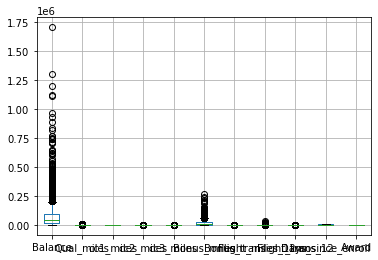

In [55]:
data.boxplot()

C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1270: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1271: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<AxesSubplot:>

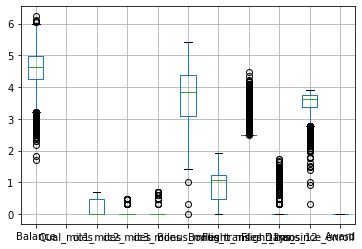

In [56]:
data.apply(np.log10).boxplot()

In [57]:
array=data.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [58]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)

In [59]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [60]:
dbscan=DBSCAN(eps=0.7,min_samples=8)
dbscan.fit(X)

DBSCAN(eps=0.7, min_samples=8)

In [61]:
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [62]:
cl=pd.DataFrame(dbscan.labels_, columns=["cluster"])

In [63]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,4
3997,0


In [64]:
clustered=pd.concat([data,cl],axis=1)
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [65]:
clustered.mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award                    0.370343
cluster                  1.105776
dtype: float64

In [66]:
clustered.sort_values("cluster")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,-1
3021,20537,0,3,1,1,44791,21,2612,4,1569,1,-1
3023,24563,0,1,1,1,5718,8,4218,5,1776,0,-1
3027,129919,719,1,1,1,7150,5,650,2,3053,1,-1
3031,36459,0,1,1,1,7573,17,5473,15,2885,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3359,20318,0,1,2,1,6990,13,0,0,1956,0,12
2421,41062,0,1,2,1,8275,11,0,0,3356,0,12
2741,42970,0,1,2,1,7889,14,0,0,2256,0,12
2317,10458,0,1,2,1,10458,12,0,0,3726,0,12
